Implementation of translation, addition and subtraction on supported dimensions by exploiting properties of the Laplace trasfrom. See http://people.bu.edu/marc777/docs/WeberFechner-CoCoNIPS.pdf for more details. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from support import Support
from math_operations import *
%matplotlib inline

### Translation

Let's say we have some variable out in the world with value 3.

In [23]:
a = 3

We have some sensor for measuring that variable. Our sensor has buff_len of log-spaced tuning curves, from tstr_min to tstr_max.

In [24]:
a_support = Support(tstr_min=1, tstr_max=10, buff_len=50, k=10, dt=0.001, g=0, Nt=1)

When we observe a=3, these are the value of the tuning curves of our sensor.

In [25]:
a_support.set_input(time_index=0, f=a)

Nodes with receptive fields around 3 have the highest amplitude (they peak at a*k/(k+1)).

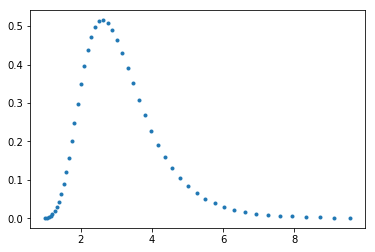

In [26]:
_ = plt.plot(a_support.Taustarlist[a_support.k:-a_support.k], a_support.til_f[a_support.k:-a_support.k, 0],'.')

Since our tuning curves were constructed via Laplace and inverse Laplace transform we can translate them by modulating the synapitc weights in function translate. In this case we tranlate them by 3.

In [27]:
a_support = translate(a_support, delta=3, time_index=0)

Now the nodes with receptive fields around 6 have the largest peak (notice that the representation got wider, this is because of the log compression).

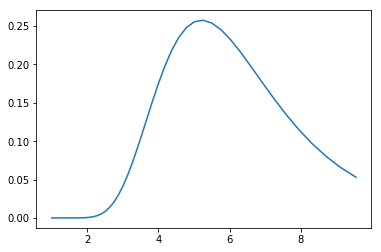

In [7]:
_ = plt.plot(a_support.Taustarlist[a_support.k:-a_support.k], a_support.til_f[a_support.k:-a_support.k, 0])

### Addition

Two values out in the world that we want to add.

In [8]:
a = 3
b = 5

We have log spaced sensors for each of them, as well for the result of the addition, c.

In [9]:
a_support = Support(tstr_min=1, tstr_max=10, buff_len=50, k=10, dt=0.001, g=0, Nt=1)
b_support = Support(tstr_min=1, tstr_max=10, buff_len=50, k=10, dt=0.001, g=0, Nt=1)
c_support = Support(tstr_min=1, tstr_max=10, buff_len=50, k=10, dt=0.001, g=0, Nt=1)

Set the receptors to values of the variables.

In [10]:
a_support.set_input(time_index=0, f=a)
b_support.set_input(time_index=0, f=b)

They peak around 3 and 5.

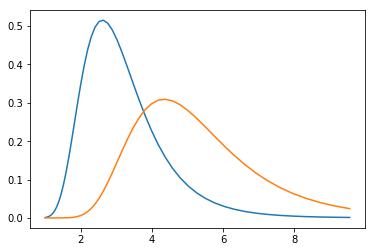

In [11]:
_ = plt.plot(a_support.Taustarlist[a_support.k:-a_support.k], a_support.til_f[a_support.k:-a_support.k, 0])
_ = plt.plot(b_support.Taustarlist[b_support.k:-b_support.k], b_support.til_f[b_support.k:-b_support.k, 0])

We add the variables by doing convolution in the Laplace domain (product of leaky integrators).

In [12]:
c_support = add_distributions(a_support, b_support, c_support, 0)

It peaks little before 8 (again, notice it's wider).

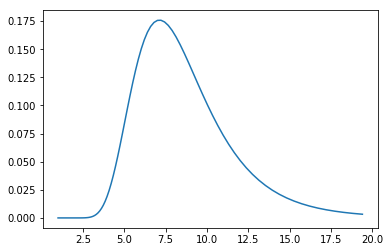

In [22]:
_ = plt.plot(c_support.Taustarlist[c_support.k:-c_support.k], c_support.til_f[c_support.k:-c_support.k, 0])

### Subtraction

Two values out in the world that we want to subtract.

In [14]:
a = 7
b = 9

We have log spaced sensors for each of them, as well for the result of the subtraction, c.

In [15]:
a_support = Support(tstr_min=1, tstr_max=20, buff_len=100, k=10, dt=0.001, g=0, Nt=1)
b_support = Support(tstr_min=1, tstr_max=20, buff_len=100, k=10, dt=0.001, g=0, Nt=1)
c_support = Support(tstr_min=1, tstr_max=20, buff_len=100, k=10, dt=0.001, g=0, Nt=1)

Set the receptors to values of the variables.

In [16]:
a_support.set_input(time_index=0, f=a)
b_support.set_input(time_index=0, f=b)

They peak around 7 and 9 (notice tstr_max is larger than before).

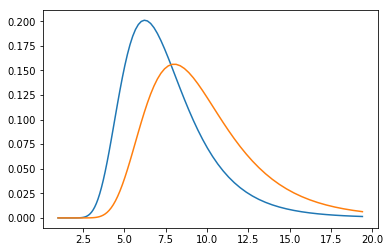

In [17]:
_ = plt.plot(a_support.Taustarlist[a_support.k:-a_support.k], a_support.til_f[a_support.k:-a_support.k, 0])
_ = plt.plot(b_support.Taustarlist[b_support.k:-b_support.k], b_support.til_f[b_support.k:-b_support.k, 0])

We add the variables by first mirroring the second argument (-b) then adding tstr_max/2 to it and finally  computing convolution. All the operation are done on the representaiton in theLaplace domain (on leaky integrators). Intuitivly, if a=7, b=9 and tstr_max=20, this computes 7 + ((-9) + 20/2) = 8. 8 is at -2 from the new zero point (tstr_max/2). On the other hand, if a=9, b=7 and tstr_max=20, this computes 9 + ((-7) + 20/2) = 12. 12 is at 2 from the new zero point (tstr_max/2).

In [18]:
c_support = subtract_distributions(a_support, b_support, c_support, 0)

The peak is around -2 (as it should be since we are computing 7-9). Notice that we "renamed" taustarlist such that node that peaks in the center (at 10) is now 0, left of it are negative and right of it are possitive numers. Notice also that with this representation we can only compute subtractions with resulting values between -10 and 10. Finally, notice that the width of the peak is very non-trival function of the input. This is yet to be explored.

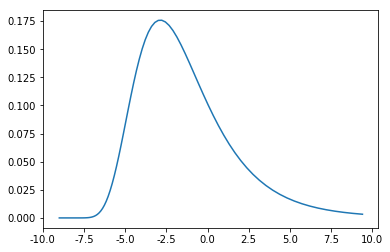

In [20]:
ax = plt.subplot(111)
_ = ax.plot(c_support.Taustarlist[c_support.k:-c_support.k], c_support.til_f[c_support.k:-c_support.k, 0])
_ = ax.set_xticks(np.arange(0,21,2.5)) 
_ = ax.set_xticklabels(np.arange(-10,11,2.5))